In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-dataset/synthetic_vehicle_data_with_anomalies.csv


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load your dataset
df = pd.read_csv("/kaggle/input/synthetic-dataset/synthetic_vehicle_data_with_anomalies.csv")

In [20]:
# 1️⃣ Basic Info
print("📌 Dataset Shape:", df.shape)
display(df.head())
print("\n🕳️ Missing Values:")
print(df.isnull().sum())


📌 Dataset Shape: (3000, 10)


,vehicle_id,timestamp,speed,engine_temp,fuel_efficiency,ambient_temp,rpm,brake_events,fault_code,anomaly_type
0,VEH-001,2025-07-01,57.41,98.33,14.13,31,3810,6,NaN,excessive_braking
1,VEH-002,2025-07-01,64.19,86.41,11.41,25,3538,6,NaN,excessive_braking
2,VEH-003,2025-07-01,57.34,79.89,16.06,36,3806,2,NaN,normal
3,VEH-004,2025-07-01,65.61,74.64,7.86,26,3534,3,NaN,low_fuel_efficiency
4,VEH-005,2025-07-01,67.33,81.36,16.90,35,2724,2,NaN,normal



🕳️ Missing Values:
vehicle_id            0
timestamp             0
speed                 0
engine_temp           0
fuel_efficiency       0
ambient_temp          0
rpm                   0
brake_events          0
fault_code         2985
anomaly_type          0
dtype: int64


In [21]:
print("\n🚨 Anomaly Types Count:")
print(df['anomaly_type'].value_counts())

# 3️⃣ Summary Statistics
display(df.describe())




🚨 Anomaly Types Count:
anomaly_type
normal                     2317
excessive_braking           453
high_rpm                    183
low_fuel_efficiency          32
engine_overheat_at_idle      15
Name: count, dtype: int64


,speed,engine_temp,fuel_efficiency,ambient_temp,rpm,brake_events
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,54.935507,84.989710,15.002017,32.564333,3523.152000,3.057333
std,14.844451,10.037289,3.027984,4.666096,860.391206,1.999511
min,0.680000,60.000000,5.000000,25.000000,2001.000000,0.000000
25%,45.025000,78.007500,12.990000,28.000000,2783.750000,1.000000
50%,55.175000,84.950000,15.020000,33.000000,3514.500000,3.000000
75%,64.795000,91.872500,17.060000,37.000000,4247.250000,5.000000
max,103.770000,120.840000,25.000000,40.000000,5000.000000,6.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

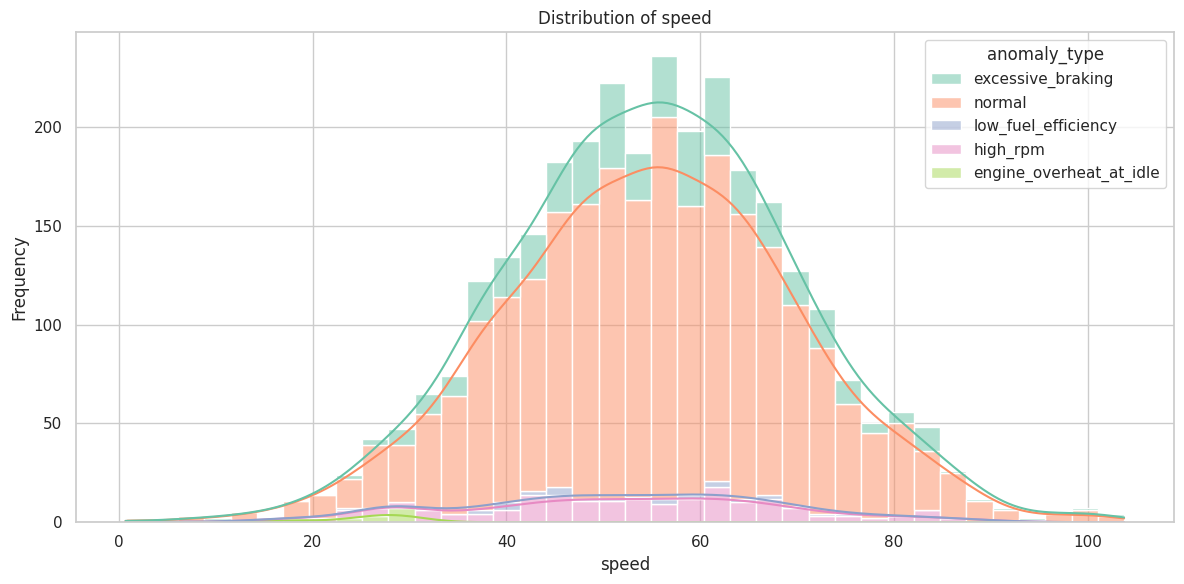

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

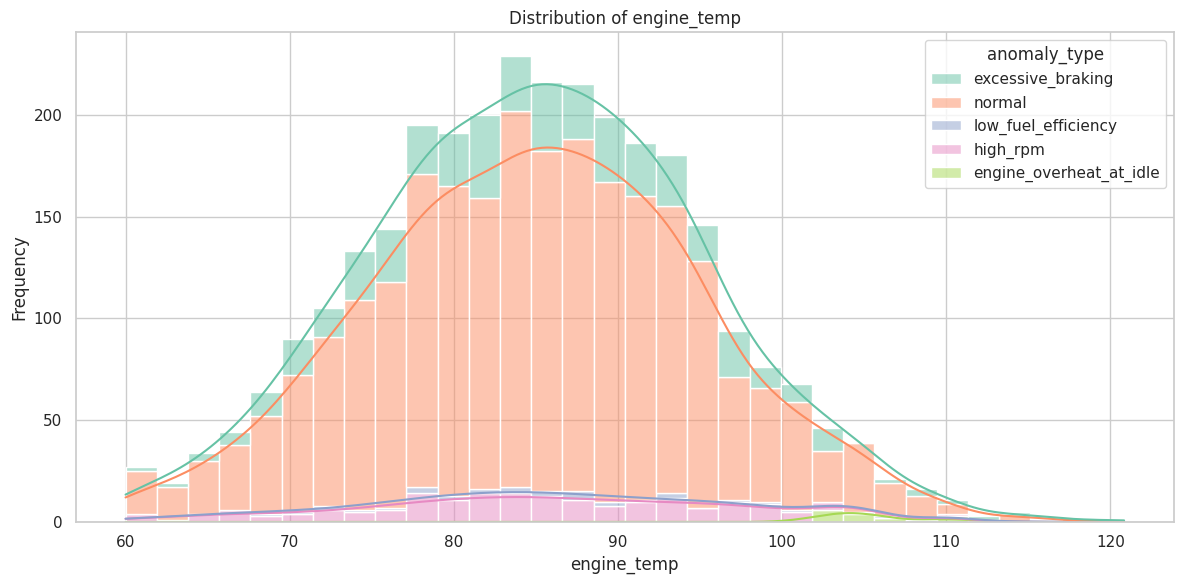

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

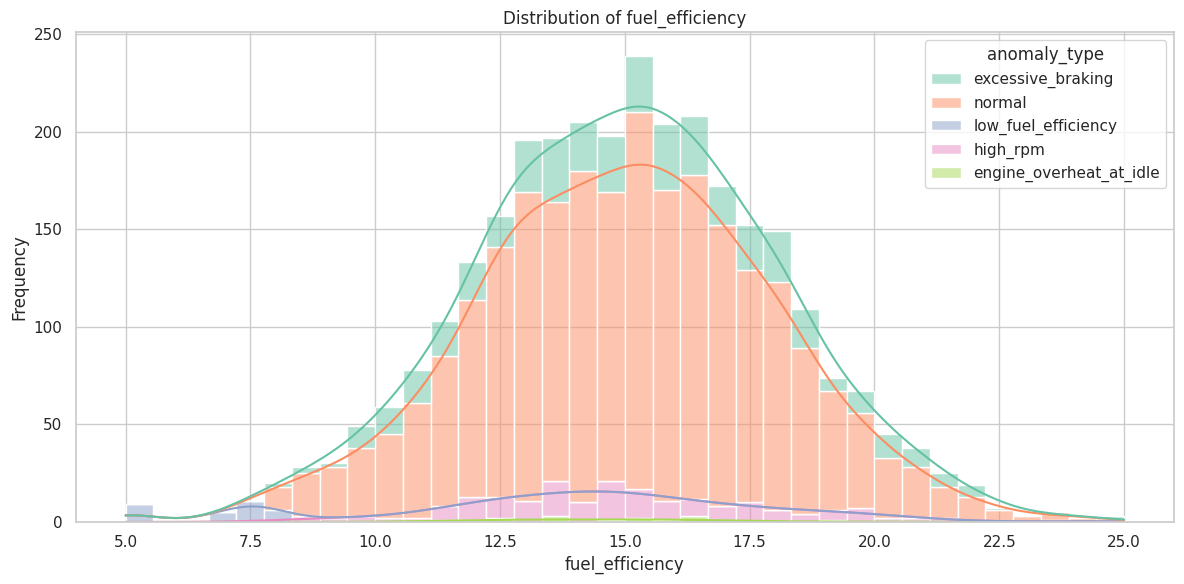

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

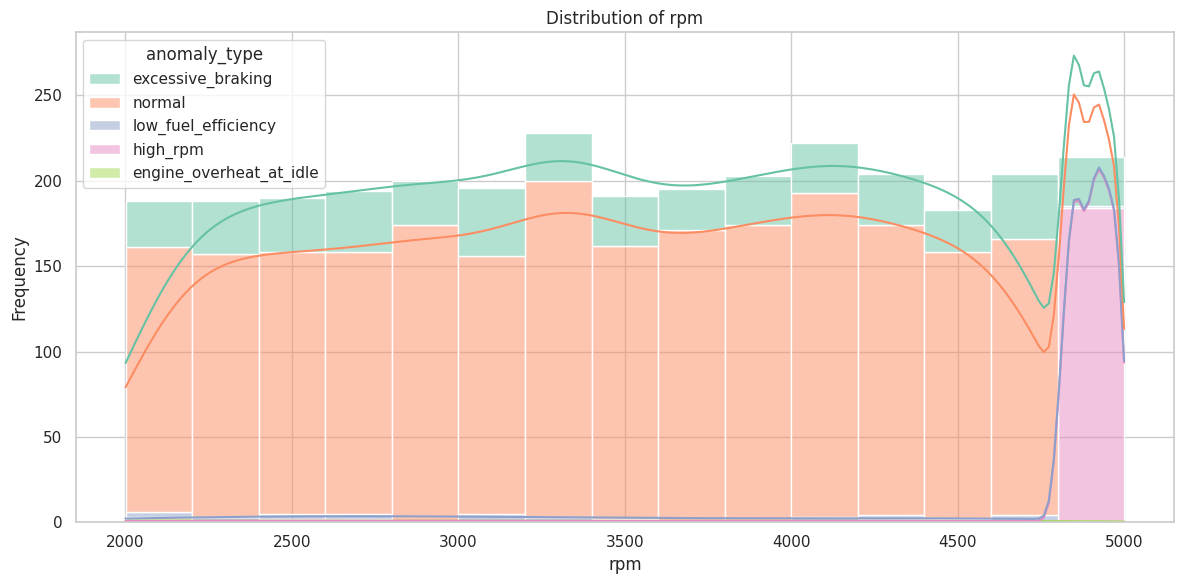

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

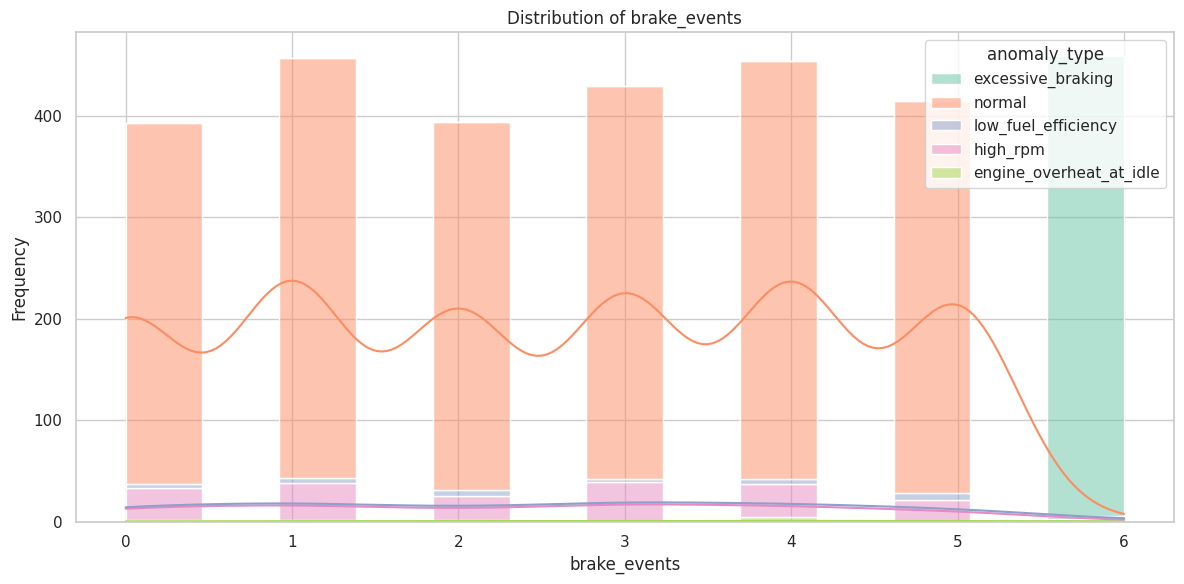

In [23]:
features = ['speed', 'engine_temp', 'fuel_efficiency', 'rpm', 'brake_events']

for col in features:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True, hue='anomaly_type', palette='Set2', multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

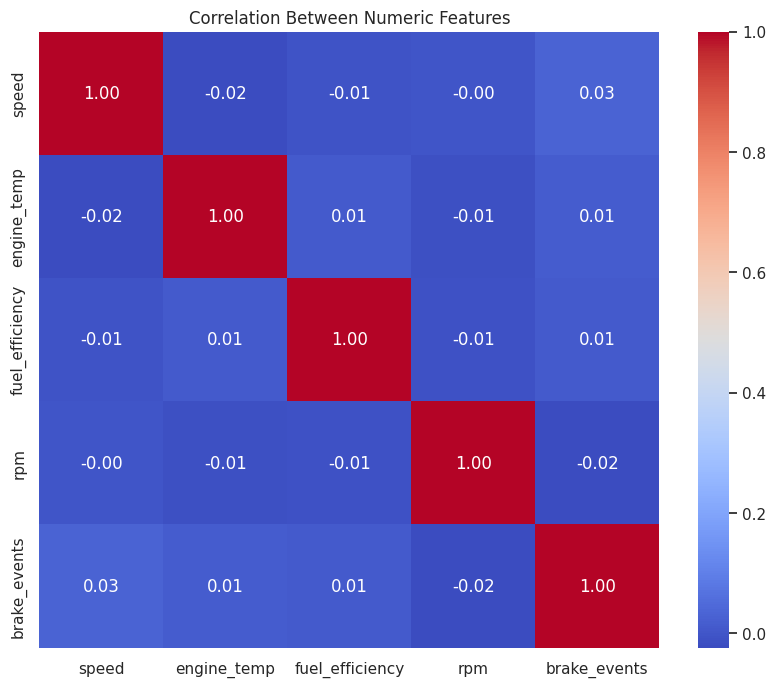

In [24]:
# 5️⃣ Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

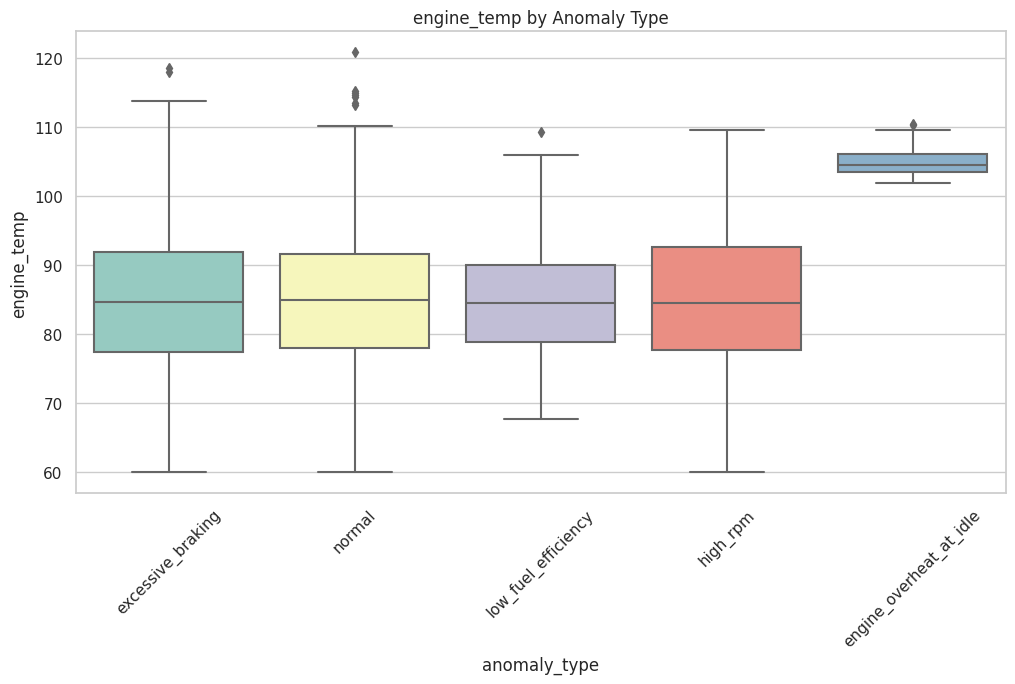

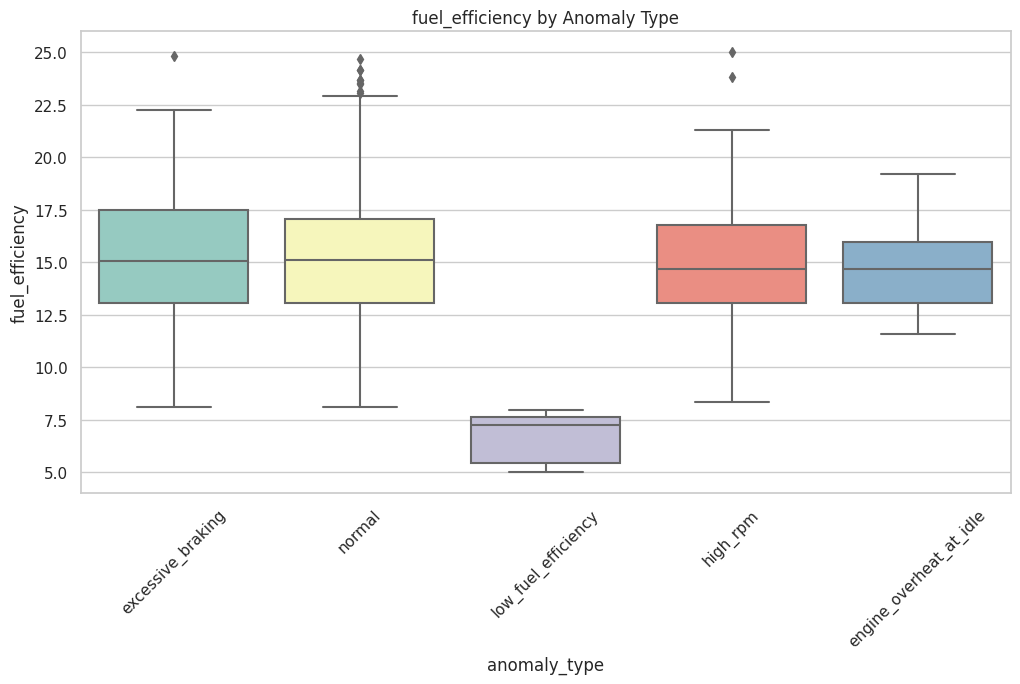

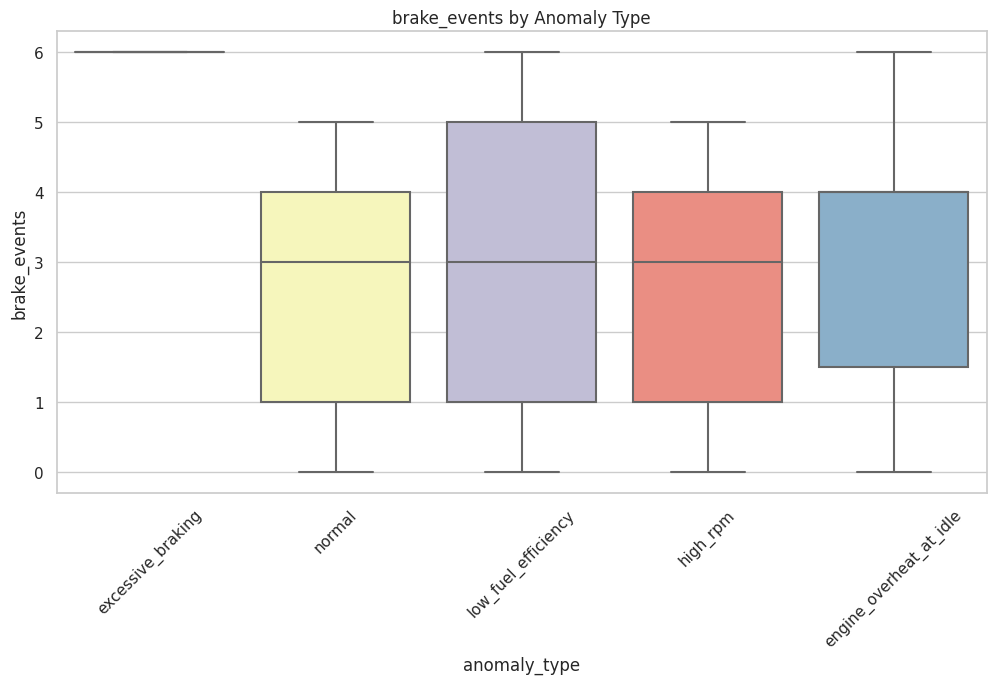

In [25]:
# 6️⃣ Boxplots by Anomaly Type
for col in ['engine_temp', 'fuel_efficiency', 'brake_events']:
    plt.figure()
    sns.boxplot(data=df, x='anomaly_type', y=col, palette='Set3')
    plt.title(f'{col} by Anomaly Type')
    plt.xticks(rotation=45)
    plt.show()

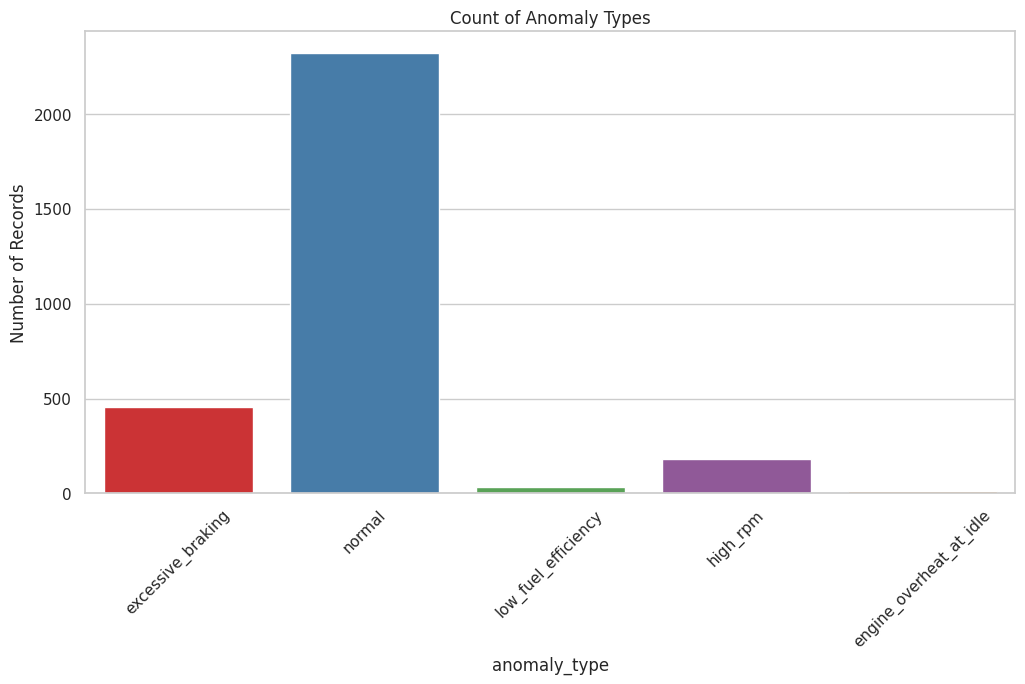

In [26]:
# 7️⃣ Anomaly Count Plot
plt.figure()
sns.countplot(data=df, x='anomaly_type', palette='Set1')
plt.title("Count of Anomaly Types")
plt.xticks(rotation=45)
plt.ylabel("Number of Records")
plt.show()
